<a href="https://colab.research.google.com/github/anurodhme/HrProject_PowerBI-and-sql/blob/main/Assessment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
path="/content/drive/MyDrive/Dataset/Sales_Data.xlsx"
df=pd.read_excel(path)

In [22]:
df.head()


,Year,Quarter,Product Category,Sales Channel,Region,Advertising Spend (in $),Sales Revenue (in $),Customer Segment,Competitor Pricing,Product Life Cycle Stage,Economic Indicator,Supply Chain Efficiency,Inventory Level
0,2021,Q3,Electronics,Online,Midwest,3855,189607,Teens,304,Maturity,4.6,0.84,Low
1,2021,Q2,Clothing,Retail Store,West,10891,154694,Teens,176,Maturity,4.7,0.92,High
2,2021,Q2,Appliances,Retail Store,West,2090,174503,Seniors,312,Growth,5.2,0.83,High
3,2021,Q3,Appliances,Retail Store,Midwest,6412,122266,Families,180,Growth,5.0,0.81,Low
4,2021,Q4,Appliances,Retail Store,West,18137,199484,Teens,300,Decline,4.7,0.87,Medium


In [36]:
df.shape
df.dtypes

Year                          int64
Quarter                      object
Product Category             object
Sales Channel                object
Region                       object
Advertising Spend (in $)      int64
Sales Revenue (in $)          int64
Customer Segment             object
Competitor Pricing            int64
Product Life Cycle Stage     object
Economic Indicator          float64
Supply Chain Efficiency      object
Inventory Level              object
dtype: object

In [37]:
for column in df.columns:
    unique_types = df[column].unique()
    print(f"Unique types in column '{column}': {unique_types}")

Unique types in column 'Year': [2021 2020]
Unique types in column 'Quarter': ['Q3' 'Q2' 'Q4' 'Q1']
Unique types in column 'Product Category': ['Electronics' 'Clothing' 'Appliances']
Unique types in column 'Sales Channel': ['Online' 'Retail Store']
Unique types in column 'Region': ['Midwest' 'West' 'South' 'Northeast']
Unique types in column 'Advertising Spend (in $)': [ 3855 10891  2090  6412 18137 16492  3461 13065  8493 13387 18147  6317
 12483 18963  9751  7469  4731 16314  2468 11739  4626 12388  8794 14526
  9311  7613 19653 12944  2231  3389 12430 14676 19005 16272 19192 12622
 18425 14804 10505 15836  9519  4017 12588  7064  7656  6334 13829 10475
 15485  8217]
Unique types in column 'Sales Revenue (in $)': [189607 154694 174503 122266 199484  32460 152110 108810  29828 140325
 197393  55408 194394  36299  76251 115529 115552 128832  56710 195036
 184578 193954  90071 168701  93729 140235  96728  89894 154136  60316
 105178  91844 142311 189211  33163 138741 117912  74028 188321

In [38]:
columns_to_exclude = ['Advertising Spend (in $)', 'Sales Revenue (in $)', 'Competitor Pricing', 'Economic Indicator', 'Supply Chain Efficiency']

for column in df.columns:
    if column not in columns_to_exclude:
        unique_types = df[column].unique()
        print(f"Unique types in column '{column}': {unique_types}")

Unique types in column 'Year': [2021 2020]
Unique types in column 'Quarter': ['Q3' 'Q2' 'Q4' 'Q1']
Unique types in column 'Product Category': ['Electronics' 'Clothing' 'Appliances']
Unique types in column 'Sales Channel': ['Online' 'Retail Store']
Unique types in column 'Region': ['Midwest' 'West' 'South' 'Northeast']
Unique types in column 'Customer Segment': ['Teens' 'Seniors' 'Families' 'Professionals' 'Young Adults']
Unique types in column 'Product Life Cycle Stage': ['Maturity' 'Growth' 'Decline' 'Introduction']
Unique types in column 'Inventory Level': ['Low' 'High' 'Medium']


## **Sales Trend and Product Category Performance**


Analyze and visualize the total sales revenue trend quarter by quarter. Is there an observable trend over the quarters?
---



In [39]:
# Irrespective of the year comparing the quarters only
quarterly_sales_revenue = df.groupby('Quarter')['Sales Revenue (in $)'].sum()
print(quarterly_sales_revenue)



Quarter
Q1    1989877
Q2    1478153
Q3    1669272
Q4     878794
Name: Sales Revenue (in $), dtype: int64


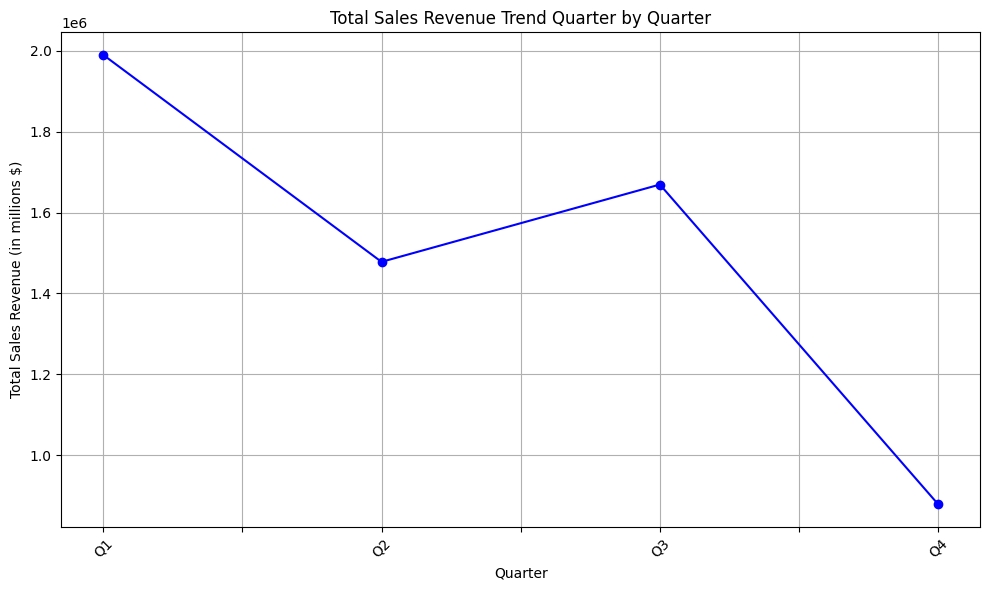

In [40]:
plt.figure(figsize=(10, 6))
quarterly_sales_revenue.plot(marker='o', color='b', linestyle='-')
plt.title('Total Sales Revenue Trend Quarter by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Revenue (in millions $)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Analysis of Total Sales Revenue by Quarter

The analysis focuses on the total sales revenue across quarters, disregarding the variance between different years. The findings are as follows:

Q1 (First Quarter): The total sales revenue for the first quarter amounted to $1,989,877. This quarter often reflects the post-holiday period, where consumer spending may decline after peak holiday seasons.

Q2 (Second Quarter): The total sales revenue dropped to $1,478,153 in the second quarter. This decline might be attributed to various factors, such as seasonal changes, economic conditions, or shifts in consumer behavior.

Q3 (Third Quarter): The total sales revenue increased to $1,669,272 in the third quarter. This uptick could be indicative of increased consumer spending, potentially driven by factors like seasonal sales, promotions, or improved economic conditions.

Q4 (Fourth Quarter): The total sales revenue decreased notably to $878,794 in the fourth quarter. This decline may align with the end-of-year holiday season, where consumer spending tends to taper off after the peak shopping period.

In [41]:
#Grouping the sales revenue by quarters for the years 2020,2021 seperately
df_2020 = df[df['Year'] == 2020]
df_2021 = df[df['Year'] == 2021]

quarterly_sales_revenue_2020 = df_2020.groupby('Quarter')['Sales Revenue (in $)'].sum()
quarterly_sales_revenue_2021 = df_2021.groupby('Quarter')['Sales Revenue (in $)'].sum()

print("Quarterly Sales Revenue of 2020:",quarterly_sales_revenue_2020)
print("Quarterly Sales Revenue of 2021:",quarterly_sales_revenue_2021)

Quarterly Sales Revenue of 2020: Quarter
Q1    1287872
Q2     865310
Q3     256653
Q4     549419
Name: Sales Revenue (in $), dtype: int64
Quarterly Sales Revenue of 2021: Quarter
Q1     702005
Q2     612843
Q3    1412619
Q4     329375
Name: Sales Revenue (in $), dtype: int64


**Q1 (First Quarter):**

In 2020, Q1 saw total sales revenue of 1,287,872, reflecting a strong start to the year.
However, 2021 experienced a slight decline with 702,005 in sales revenue, potentially influenced by ongoing pandemic uncertainties.
Despite the decrease, Q1 of 2021 shows signs of resilience and gradual recovery compared to the previous year.

**Q2 (Second Quarter):**
2020's Q2 witnessed a decrease in sales revenue to 865,310, likely impacted by the onset of the COVID-19 pandemic.Conversely, in 2021, Q2 remained relatively stable with 612,843 in sales revenue, reflecting continued adaptation to the pandemic's effects.
The comparison suggests a more resilient performance in Q2 of 2021, indicating improved business strategies and consumer behavior adjustments.

**Q3 (Third Quarter):**

2020's Q3 saw a notable decline in sales revenue to 256,653, reflecting the peak impact of pandemic-related restrictions.
In stark contrast, 2021 experienced a significant rebound with 1,412,619 in sales revenue, demonstrating a remarkable recovery trajectory.
The substantial increase in Q3 of 2021 highlights the effectiveness of reopening measures and pent-up consumer demand following vaccination efforts.

**Q4 (Fourth Quarter):**

Q4 of 2020 witnessed a slight recovery with 549,419 in sales revenue, possibly buoyed by holiday shopping.
However, 2021's Q4 saw a decrease to 329,375 in sales revenue, indicating a potential post-holiday slowdown and lingering pandemic effects.
Despite the decline, both years' Q4 performances underscore the seasonal fluctuations and challenges businesses face during year-end periods.






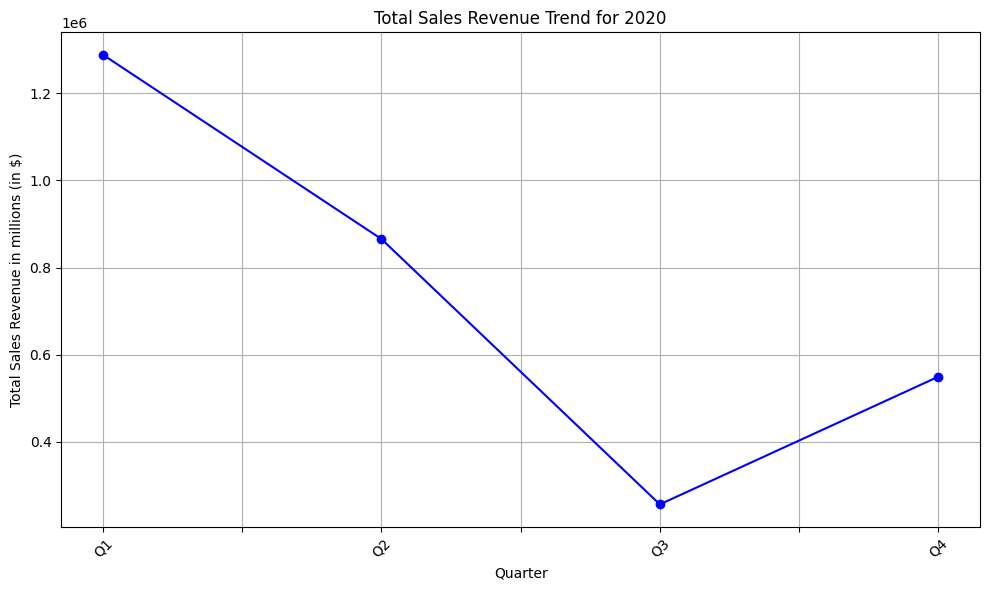

In [42]:
# Plotting the total sales revenue trend for 2020
plt.figure(figsize=(10, 6))
quarterly_sales_revenue_2020.plot(marker='o', color='b', linestyle='-')
plt.title('Total Sales Revenue Trend for 2020')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Revenue in millions (in $)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



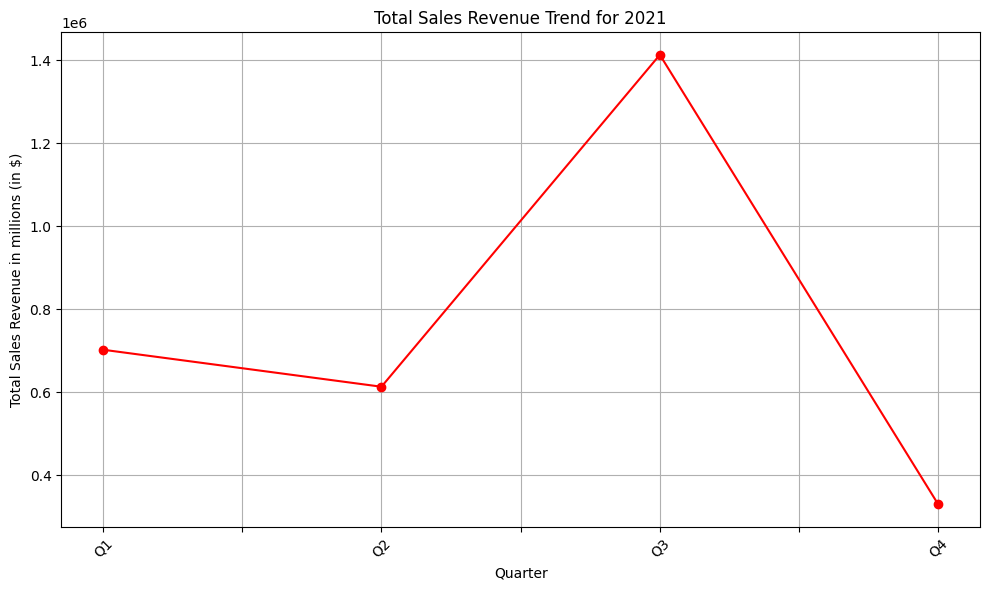

In [43]:
# Plotting the total sales revenue trend for 2021
plt.figure(figsize=(10, 6))
quarterly_sales_revenue_2021.plot(marker='o', color='r', linestyle='-')
plt.title('Total Sales Revenue Trend for 2021')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Revenue in millions (in $)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The comparison highlights the impact of the COVID-19 pandemic on sales performance, with 2020 experiencing significant fluctuations and challenges.
In contrast, 2021 shows signs of recovery and resilience, particularly evident in the strong rebound observed in the third quarter.

*Identify which product categories are experiencing significant changes in sales revenue. Support your analysis with pivot tables or charts.*


In [46]:
#Ignoring the years lets only do it for the quarters
pivot_table = df.pivot_table(index='Product Category', columns='Quarter', values='Sales Revenue (in $)', aggfunc='sum')
print(pivot_table)



Quarter               Q1      Q2      Q3      Q4
Product Category                                
Appliances        510173  585958  426901  199484
Clothing          541579  429141  441231  510116
Electronics       938125  463054  801140  169194


<Figure size 1000x600 with 0 Axes>

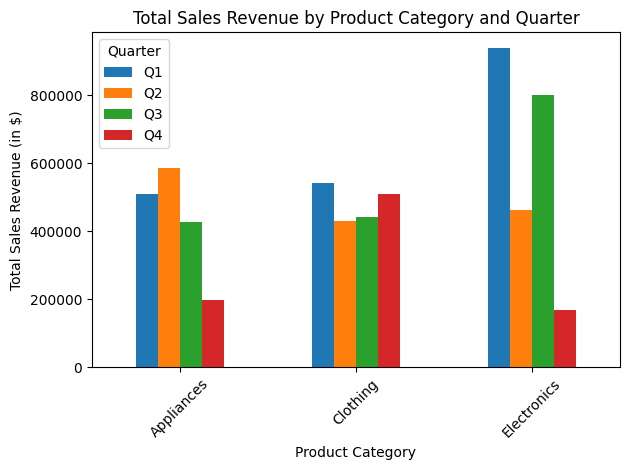

In [47]:
# Plotting the pivot table
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar')
plt.title('Total Sales Revenue by Product Category and Quarter')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Revenue (in $)')
plt.xticks(rotation=45)
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

In [49]:
pivot_2020 = pd.pivot_table(df[df['Year'] == 2020], values='Sales Revenue (in $)', index='Product Category', columns='Quarter', aggfunc='sum')
pivot_2021 = pd.pivot_table(df[df['Year'] == 2021], values='Sales Revenue (in $)', index='Product Category', columns='Quarter', aggfunc='sum')
print(pivot_2020)
print(pivot_2021)


Quarter                 Q1        Q2        Q3        Q4
Product Category                                        
Appliances        190594.0  213045.0       NaN       NaN
Clothing          444260.0  189211.0  256653.0  413388.0
Electronics       653018.0  463054.0       NaN  136031.0
Quarter                 Q1        Q2        Q3        Q4
Product Category                                        
Appliances        319579.0  372913.0  426901.0  199484.0
Clothing           97319.0  239930.0  184578.0   96728.0
Electronics       285107.0       NaN  801140.0   33163.0


To identify which product categories are experiencing significant changes in sales revenue, we can compare the sales revenue between 2020 and 2021 for each category across quarters. Based on the provided data, we can observe the following significant changes:

1. Appliances:
There is a noticeable increase in sales revenue across all quarters in 2021 compared to 2020. This suggests a significant improvement in the performance of the Appliances category.

2. Clothing:
While there is a decrease in sales revenue in some quarters (Q1 and Q4), there are also increases in others (Q2 and Q3). The overall pattern is mixed, indicating some volatility in the Clothing category's performance.

3. Electronics:
There are significant fluctuations in sales revenue between 2020 and 2021 across quarters. In particular, there is a substantial increase in Q3 of 2021 compared to 2020, suggesting a notable improvement in the Electronics category's performance during that period.

Based on these observations, the Appliances category appears to be experiencing the most significant positive changes in sales revenue, followed by Electronics. Clothing shows mixed performance with both increases and decreases in sales revenue across quarters.

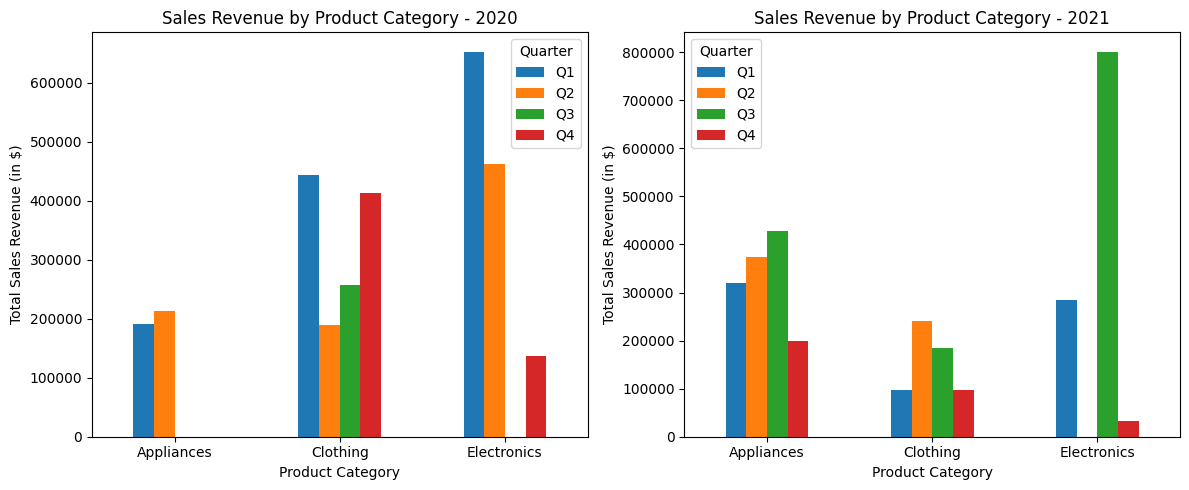

In [48]:

# Plotting pivot tables for 2020
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Sales Revenue by Product Category - 2020')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Revenue (in $)')
pivot_2020.plot(kind='bar', ax=plt.gca())
plt.xticks(rotation=0)

# Plotting pivot tables for 2021
plt.subplot(1, 2, 2)
plt.title('Sales Revenue by Product Category - 2021')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Revenue (in $)')
pivot_2021.plot(kind='bar', ax=plt.gca())
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [53]:
grouped = df.groupby(['Product Category', 'Quarter'])['Sales Revenue (in $)'].sum().unstack()

# Calculate the difference in sales revenue between consecutive quarters
revenue_changes = grouped.diff(axis=1)

# Calculate the mean absolute change in revenue for each category
mean_abs_changes = revenue_changes.abs().mean(axis=1)

# Sort the categories by the mean absolute change in revenue
sorted_categories = mean_abs_changes.sort_values(ascending=False)

print("Categories experiencing significant changes in sales revenue:")
print(sorted_categories)

Categories experiencing significant changes in sales revenue:
Product Category
Electronics    481701.000000
Appliances     154086.333333
Clothing        64471.000000
dtype: float64


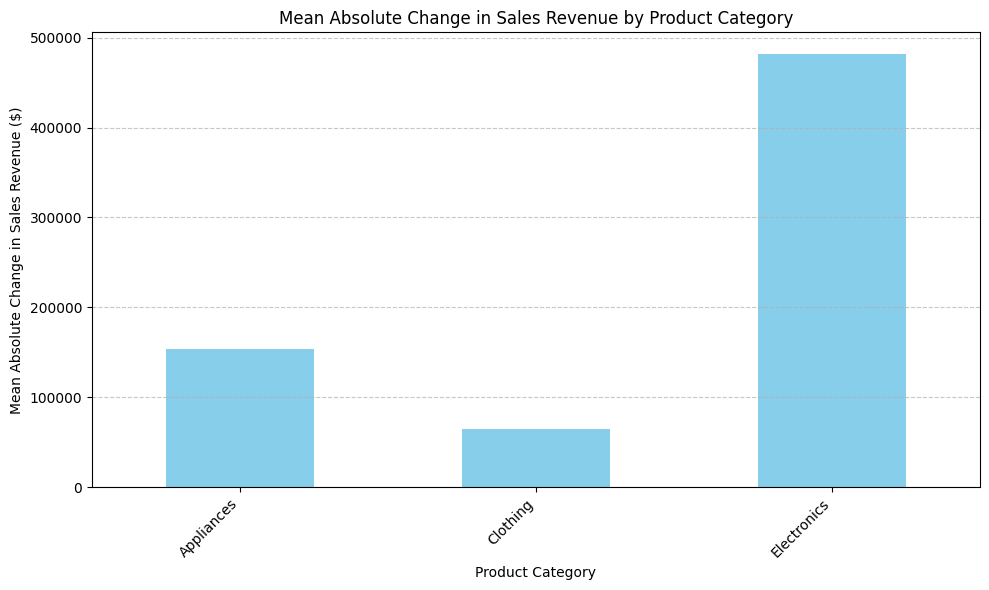

In [54]:
plt.figure(figsize=(10, 6))
mean_abs_changes.plot(kind='bar', color='skyblue')
plt.title('Mean Absolute Change in Sales Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Absolute Change in Sales Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Sales Channel Efficiency and Regional Performance**

**Compare the performance of different sales channels (Retail Store vs Online) in terms of revenue generation. Which channel shows better efficiency?**

In [55]:
channel_data = df.groupby('Sales Channel').agg({'Sales Revenue (in $)': 'sum', 'Advertising Spend (in $)': 'sum'})

channel_data['Efficiency Ratio'] = channel_data['Sales Revenue (in $)'] / channel_data['Advertising Spend (in $)']

print(channel_data)

               Sales Revenue (in $)  Advertising Spend (in $)  \
Sales Channel                                                   
Online                      2745315                    254854   
Retail Store                3270781                    294237   

               Efficiency Ratio  
Sales Channel                    
Online                10.772109  
Retail Store          11.116144  


From the output we can say that:

1.Total Sales Revenue:
Sales revenue generated through Retail Stores is higher than that of Online channels. Retail Stores have generated a total sales revenue of 3,270,781, while Online channels have generated 2,745,315 in sales revenue.

2.Advertising Spend:
The total advertising spend for Retail Stores is also higher compared to Online channels. Retail Stores have spent 294,237 on advertising, whereas Online channels have spent 254,854.

3.Efficiency Ratio:
Retail Stores indeed have a slightly higher efficiency ratio compared to Online Channels, suggesting that they generate slightly more revenue per advertising dollar. Online channels have an efficiency ratio of approximately 10.77, indicating that for every dollar spent on advertising, they generate approximately $10.77 in sales revenue. On the other hand, Retail Stores have an efficiency ratio of approximately 11.12, suggesting that they generate slightly more revenue per advertising dollar compared to Online channels.

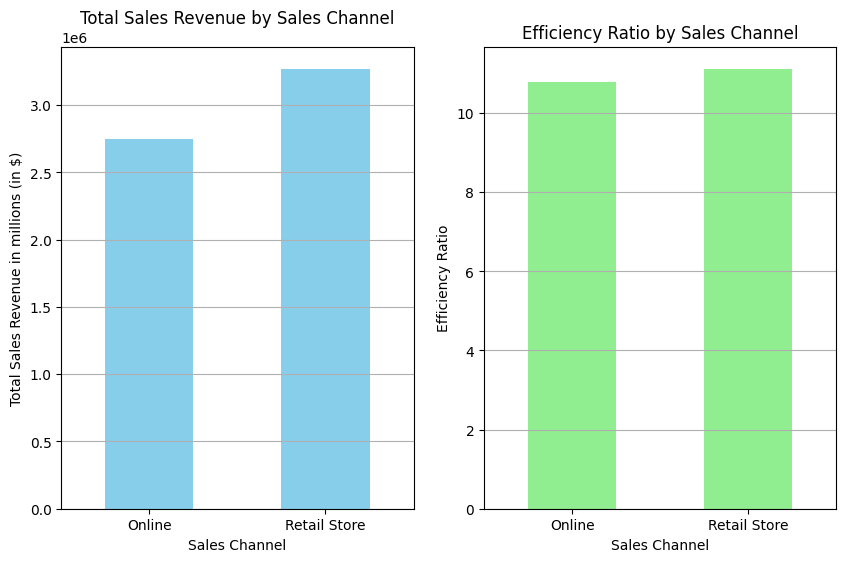

In [60]:
plt.figure(figsize=(10, 6))  # Adjusted figure size

plt.subplot(1, 2, 1)
channel_data['Sales Revenue (in $)'].plot(kind='bar', color='skyblue')
plt.title('Total Sales Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales Revenue in millions (in $)')
plt.xticks(rotation=0)
plt.grid(axis='y')

#Efficiency Ratio
plt.subplot(1, 2, 2)
channel_data['Efficiency Ratio'].plot(kind='bar', color='lightgreen')
plt.title('Efficiency Ratio by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Efficiency Ratio')
plt.xticks(rotation=0)
plt.grid(axis='y')



**Analyze and visualize which regions are performing well and which are experiencing a decline in sales.**

In [63]:
region_sales = df.groupby('Region')['Sales Revenue (in $)'].sum().sort_values(ascending=False)
print(region_sales)

Region
West         2126884
Northeast    1721659
Midwest      1573189
South         594364
Name: Sales Revenue (in $), dtype: int64
